In [2]:
import pandas as pd
import numpy as np

In [3]:
from datetime import datetime

In [7]:
now = datetime.now()
now

datetime.datetime(2018, 5, 14, 14, 20, 54, 430897)

In [9]:
now.date(), now.day, now.dst(), now.hour, now.isoformat(), now.isocalendar(), now.now(), now.minute, now.month, now.second, now.time(), now.weekday(), now.year

(datetime.date(2018, 5, 14),
 14,
 None,
 14,
 '2018-05-14T14:20:54.430897',
 (2018, 20, 1),
 datetime.datetime(2018, 5, 14, 14, 23, 17, 471456),
 20,
 5,
 54,
 datetime.time(14, 20, 54, 430897),
 0,
 2018)

In [3]:
from datetime import timedelta

In [11]:
start = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [4]:
from dateutil.parser import parse
parse('2011-11-03')

datetime.datetime(2011, 11, 3, 0, 0)

In [14]:
parse('Jan 28 2017 10:45PM')

datetime.datetime(2017, 1, 28, 22, 45)

In [18]:
dates = [datetime(2011,1,2), datetime(2011,1,5), datetime(2011,1,7), datetime(2011,1,8), datetime(2011,1,12), datetime(2011,1,10)]
ts = pd.Series(np.random.randn(6), index=dates)
ts, ts.index, ts.index.dtype, ts.index[0]

(2011-01-02   -0.102233
 2011-01-05    1.176354
 2011-01-07    0.212353
 2011-01-08    0.313466
 2011-01-12   -1.724339
 2011-01-10   -0.488725
 dtype: float64,
 DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
                '2011-01-12', '2011-01-10'],
               dtype='datetime64[ns]', freq=None),
 dtype('<M8[ns]'),
 Timestamp('2011-01-02 00:00:00'))

In [24]:
ts['01-07-2011'], ts['01/07/2011'], ts['20110107']

(2011-01-07    0.212353
 dtype: float64, 2011-01-07    0.212353
 dtype: float64, 2011-01-07    0.212353
 dtype: float64)

In [39]:
long_ts = pd.Series(np.random.randn(1000), index=pd.date_range('2001-01-01', periods=1000))
long_ts.head(5), long_ts.tail(5)

(2001-01-01    0.269619
 2001-01-02    0.909360
 2001-01-03    0.897678
 2001-01-04    2.223030
 2001-01-05    0.732295
 Freq: D, dtype: float64, 2003-09-23   -0.806170
 2003-09-24    1.668520
 2003-09-25   -1.491009
 2003-09-26    0.071166
 2003-09-27   -0.704062
 Freq: D, dtype: float64)

In [40]:
long_ts['2002'].head(5), long_ts['2002'].size

(2002-01-01   -0.934945
 2002-01-02   -0.425979
 2002-01-03    0.109201
 2002-01-04   -0.825526
 2002-01-05    0.078016
 Freq: D, dtype: float64, 365)

In [42]:
long_ts['2003-06'], long_ts['2003-06'].size

(2003-06-01    0.474749
 2003-06-02   -0.686775
 2003-06-03   -0.632194
 2003-06-04    1.268784
 2003-06-05   -0.371611
 2003-06-06   -0.548017
 2003-06-07    1.077636
 2003-06-08   -0.255543
 2003-06-09   -1.271726
 2003-06-10   -0.539100
 2003-06-11   -0.804663
 2003-06-12   -1.113611
 2003-06-13   -1.384895
 2003-06-14   -1.459643
 2003-06-15    0.509146
 2003-06-16   -0.038757
 2003-06-17    0.502723
 2003-06-18   -0.426177
 2003-06-19   -1.692776
 2003-06-20    0.690885
 2003-06-21    0.630706
 2003-06-22    0.713233
 2003-06-23   -0.623256
 2003-06-24   -0.322007
 2003-06-25    0.983833
 2003-06-26    2.220098
 2003-06-27   -0.858565
 2003-06-28   -0.198472
 2003-06-29    0.012225
 2003-06-30   -1.341184
 Freq: D, dtype: float64, 30)

In [44]:
long_ts['2001-05-01':'2001-06-01'].size

32

In [46]:
long_ts.truncate(after='2001-10-30', before='2001-10-20')

2001-10-20    0.951769
2001-10-21    0.783586
2001-10-22   -0.886776
2001-10-23    0.686720
2001-10-24    2.330341
2001-10-25   -0.362966
2001-10-26   -0.564449
2001-10-27   -1.464534
2001-10-28   -1.084379
2001-10-29    1.034509
2001-10-30    1.772280
Freq: D, dtype: float64

In [49]:
pdf = pd.DataFrame(np.random.randn(10), index=[1,1,1,1,2,2,3,3,3,4], columns=['Num'])
pdf, pdf.groupby(pdf.index).count()

(        Num
 1 -0.267603
 1 -1.304346
 1  0.020983
 1 -0.284044
 2 -0.573730
 2  0.103979
 3  0.573684
 3  0.169289
 3 -0.339023
 4 -1.865631,    Num
 1    4
 2    2
 3    3
 4    1)

In [51]:
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [53]:
pd.date_range('2001-10-10', '2002-10-10', freq='BM'), pd.date_range('2001-10-10', '2001-11-10', freq='B')

(DatetimeIndex(['2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31',
                '2002-02-28', '2002-03-29', '2002-04-30', '2002-05-31',
                '2002-06-28', '2002-07-31', '2002-08-30', '2002-09-30'],
               dtype='datetime64[ns]', freq='BM'),
 DatetimeIndex(['2001-10-10', '2001-10-11', '2001-10-12', '2001-10-15',
                '2001-10-16', '2001-10-17', '2001-10-18', '2001-10-19',
                '2001-10-22', '2001-10-23', '2001-10-24', '2001-10-25',
                '2001-10-26', '2001-10-29', '2001-10-30', '2001-10-31',
                '2001-11-01', '2001-11-02', '2001-11-05', '2001-11-06',
                '2001-11-07', '2001-11-08', '2001-11-09'],
               dtype='datetime64[ns]', freq='B'))

In [5]:
from pandas.tseries.offsets import Hour, Minute

Hour(), Hour(4)

In [9]:
pd.date_range('2010-10-10 02:10:10', '2010-10-12 12:22:22', freq='4h', normalize=True)

DatetimeIndex(['2010-10-10 00:00:00', '2010-10-10 04:00:00',
               '2010-10-10 08:00:00', '2010-10-10 12:00:00',
               '2010-10-10 16:00:00', '2010-10-10 20:00:00',
               '2010-10-11 00:00:00', '2010-10-11 04:00:00',
               '2010-10-11 08:00:00', '2010-10-11 12:00:00',
               '2010-10-11 16:00:00', '2010-10-11 20:00:00',
               '2010-10-12 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [10]:
pd.date_range('2010-10-10 02:10:10', '2010-10-12 12:22:22', freq='4h')

DatetimeIndex(['2010-10-10 02:10:10', '2010-10-10 06:10:10',
               '2010-10-10 10:10:10', '2010-10-10 14:10:10',
               '2010-10-10 18:10:10', '2010-10-10 22:10:10',
               '2010-10-11 02:10:10', '2010-10-11 06:10:10',
               '2010-10-11 10:10:10', '2010-10-11 14:10:10',
               '2010-10-11 18:10:10', '2010-10-11 22:10:10',
               '2010-10-12 02:10:10', '2010-10-12 06:10:10',
               '2010-10-12 10:10:10'],
              dtype='datetime64[ns]', freq='4H')

In [15]:
pd.date_range('2010-10-10', '2010-12-31', freq='WOM-2THU')

DatetimeIndex(['2010-10-14', '2010-11-11', '2010-12-09'], dtype='datetime64[ns]', freq='WOM-2THU')

In [17]:
ts = pd.DataFrame(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

,0
2000-01-31,-1.240779
2000-02-29,0.922742
2000-03-31,-0.754830
2000-04-30,-0.248418


In [18]:
ts.shift(2)

,0
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,-1.240779
2000-04-30,0.922742


In [19]:
ts.shift(2, freq='D')

,0
2000-02-02,-1.240779
2000-03-02,0.922742
2000-04-02,-0.754830
2000-05-02,-0.248418


In [4]:
from pandas.tseries.offsets import Day, MonthEnd

In [22]:
now = datetime(2011,11,1)
now

datetime.datetime(2011, 11, 1, 0, 0)

In [23]:
now + Day(3)

Timestamp('2011-11-04 00:00:00')

In [24]:
now + 3 * Day(2)

Timestamp('2011-11-07 00:00:00')

In [27]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [32]:
offset = MonthEnd(2)
now, offset.rollforward(now), offset.rollback(now)

(datetime.datetime(2011, 11, 1, 0, 0),
 Timestamp('2011-11-30 00:00:00'),
 Timestamp('2011-10-31 00:00:00'))

In [33]:
ts = pd.DataFrame(np.random.randn(20), index=pd.date_range('1/1/2000', periods=20, freq='4D'))
ts

,0
2000-01-01,-1.176492
2000-01-05,1.094089
2000-01-09,-0.171276
2000-01-13,-1.795329
2000-01-17,-0.688649
2000-01-21,-0.167953
2000-01-25,0.017311
2000-01-29,0.207511
2000-02-02,1.201699
2000-02-06,0.272871


In [36]:
ts.groupby(offset.rollforward).min()

,0
2000-01-31,-1.795329
2000-02-29,-2.051616
2000-03-31,-2.029535


In [38]:
ts.resample('M').min()

,0
2000-01-31,-1.795329
2000-02-29,-2.051616
2000-03-31,-2.029535


In [5]:
import pytz

In [9]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [11]:
tz = pytz.timezone('UTC')
tz

<UTC>

In [1]:
!wget https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/stock_px_2.csv

--2018-05-18 07:43:09--  https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/stock_px_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101402 (99K) [text/plain]
Saving to: ‘stock_px_2.csv’

100%[======================================>] 101,402     --.-K/s   in 0.005s  

2018-05-18 07:43:09 (18.5 MB/s) - ‘stock_px_2.csv’ saved [101402/101402]



In [9]:
close_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [10]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [11]:
close_px = close_px.resample('B').ffill()

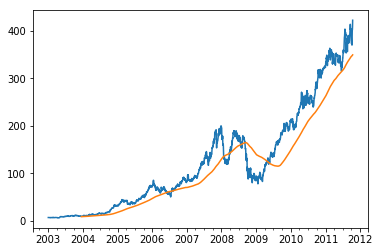

In [13]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250, ).mean().plot()

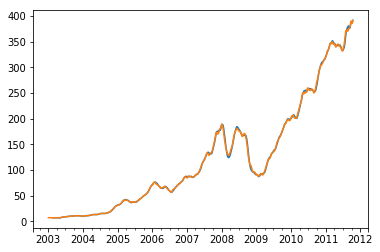

In [20]:
close_px.AAPL.rolling(30).mean().plot()
close_px.AAPL.ewm(span=30).mean().plot()

In [21]:
spx_px = close_px_all['SPX']

In [22]:
spx_rets = spx_px.pct_change()
spx_rets.head()

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Name: SPX, dtype: float64

In [23]:
returns = close_px.pct_change()

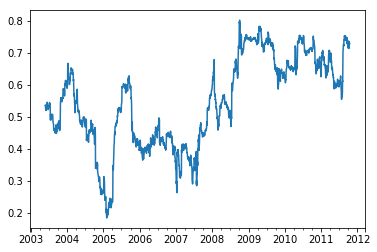

In [24]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

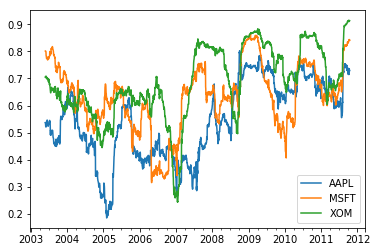

In [25]:
returns.rolling(125, min_periods=100).corr(spx_rets).plot()

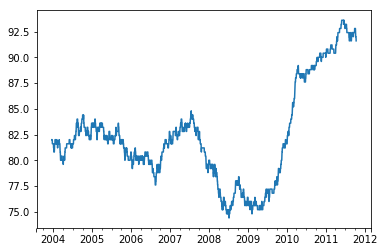

In [27]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
returns.AAPL.rolling(250).apply(score_at_2percent).plot()